# Tugas Hands-On 2
oleh Muhammad Ghiffari Iskandar - 122140189

## Soal 1 - Simulasi Sinyal PPG

### A. Buktikan Apakah Downsampling Membuat Sinyal Asli Terdistorsi dan Mengalami Aliasing, kemudian Jelaskan Apa itu Aliasing

Skipping random IBI modulation, since the offset_weight 0.89 leads to physiologically implausible wave durations of 74.2499999999997 milliseconds.


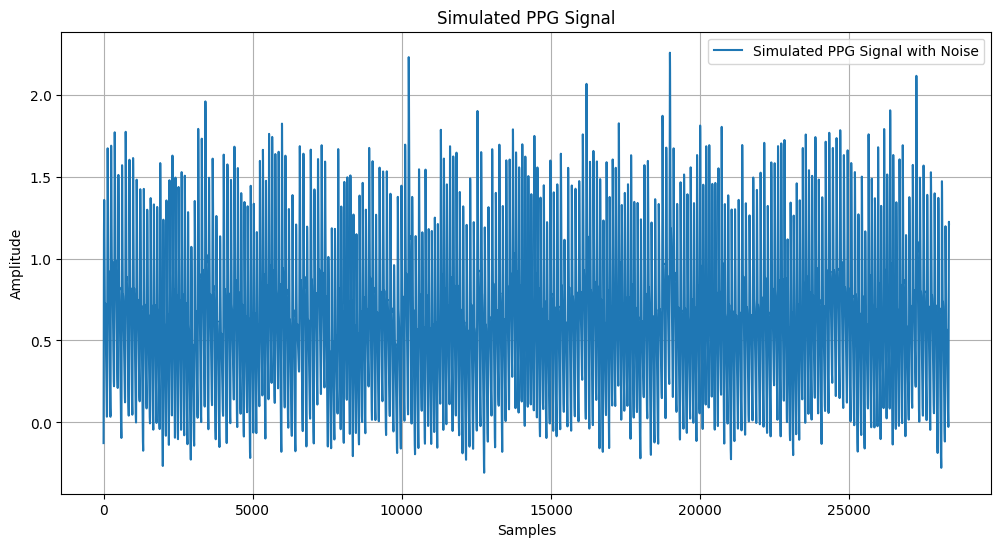

In [ ]:
# Prompting "buatkan kode program simulasi sinyal PPG menggunakan 
# library neurokit2.ppg_simulate dengan ketentuan berikut: Durasi 
# 189 sekon, sampling rate 150 Hz, Noise level 0.89, Heart rate 80 
# BPM, Random state 260504"

import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

# Simulate PPG signal
ppg = nk.ppg_simulate(duration=189,         # Durasi dalam detik
                     sampling_rate=150,     # Sampling rate dalam Hz
                     ibi_randomness=0.89,   # Noise level
                     heart_rate=80,         # Heart rate dalam beats per minute
                     random_state=260504)   # Random state

# Plot the simulated PPG signal
plt.figure(figsize=(12, 6))
plt.plot(ppg, label='Simulated PPG Signal with Noise')
plt.title('Simulated PPG Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()
